## **Importation du corpus Sephora**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
corpus_sephora1 = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora.csv",sep=";", error_bad_lines=False)
corpus_sephora1.head()

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_11048\1529736055.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  corpus_sephora1 = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora.csv",sep=";", error_bad_lines=False)


,post_id,text,publication_time,collection_time,comments,likes,language
0,17902879820742557,I love so much my collections from rarebeauty ...,2023-03-02 11:21:40+00:00,2023-03-02 14:08:55.328483+00:00,4,0,en
1,18108863101296002,Absolutely stunning✨\n.\n.\n\n#makeuplooks #ma...,2023-02-28 20:40:39+00:00,2023-03-02 14:08:55.328483+00:00,19,980,en
2,17845549664938623,The tea is HOT! Did you know that these 4 big ...,2023-03-02 07:37:34+00:00,2023-03-02 14:08:55.329481+00:00,7,1555,en
3,17947486076531533,777 💌 #greeneyes #sunkissed #grannyhair #curly...,2023-02-28 17:44:23+00:00,2023-03-02 14:08:55.330465+00:00,52,3534,en
4,17965335578263008,Bugün Highlighter önerisiyle geldiimm 🥳\n\nRev...,2023-03-01 16:36:15+00:00,2023-03-02 14:08:55.330465+00:00,29,44,tr


In [3]:
corpus_sephora3k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora3k.csv",sep=";", error_bad_lines=False)
corpus_sephora3k.head()

C:\Users\a.tekiouk\AppData\Local\Temp\ipykernel_11048\2805413776.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  corpus_sephora3k = pd.read_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/corpus_sephora3k.csv",sep=";", error_bad_lines=False)


,post_id,text,publication_time,collection_time,comments,likes,language
0,18108863101296002,Absolutely stunning✨\n.\n.\n\n#makeuplooks #ma...,2023-02-28 20:40:39+00:00,2023-03-03 10:49:21.595496+00:00,22,1201,en
1,17973798661959293,¡Buenas noches! ✨\n\nHoy os traigo un post con...,2023-02-24 19:30:00+00:00,2023-03-03 10:49:21.597614+00:00,221,503,es
2,17997799147728332,Selammm🌸\n\nSephora gloss kullananlar yorumlar...,2023-03-03 08:26:08+00:00,2023-03-03 10:49:21.598609+00:00,6,85,tr
3,17978454428051718,Swatches de la palette Pro Pigment Volume 3 de...,2023-03-02 16:45:48+00:00,2023-03-03 10:49:21.599606+00:00,1,708,en
4,18022839631495044,full glam to sit in my dressing gown & I’d hav...,2023-03-01 19:25:08+00:00,2023-03-03 10:49:21.600604+00:00,56,1680,en


format publication time/collection time : *`YYYY-MM-DD HH:MM:SS+00:00`*

In [4]:
corpus_sephora3k.shape

(2827, 7)

In [5]:
corpus_sephora3k[['comments','likes']].describe()

,comments,likes
count,2827.000000,2827.000000
mean,45.510435,975.194906
std,582.241530,5413.955870
min,0.000000,0.000000
25%,1.000000,6.000000
50%,5.000000,63.000000
75%,24.000000,615.000000
max,29116.000000,212016.000000


<Axes: >

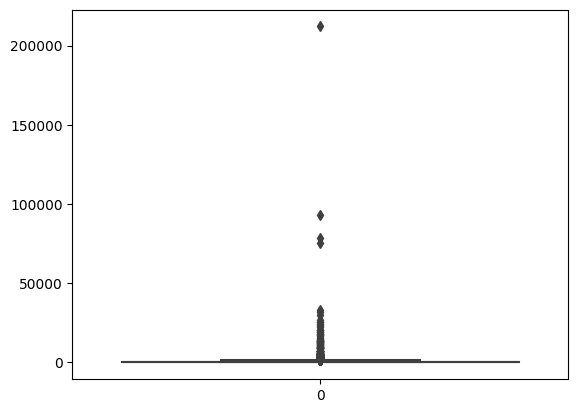

In [6]:
sns.boxplot(corpus_sephora3k['likes'])

<Axes: >

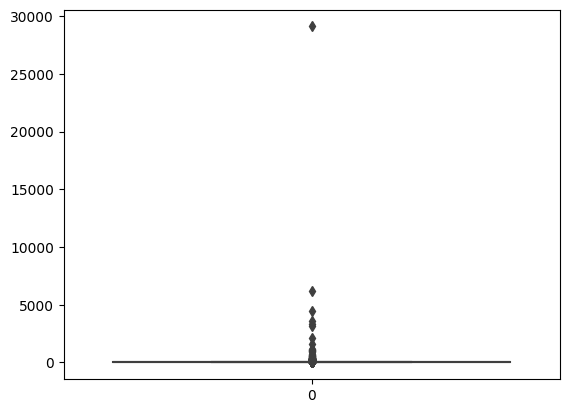

In [7]:
sns.boxplot(corpus_sephora3k['comments'])

In [8]:
corpus_sephora3k['language'].unique()

array(['en', 'es', 'tr', 'id', 'pl', 'fr', 'el', 'af', 'ca', 'nl', 'it',
       'pt', 'ar', 'hr', 'tl', 'de', 'fi', 'uk', 'et', nan, 'ja', 'sv',
       'ko', 'no', 'fa', 'sk', 'ru', 'sl', 'ro', 'da', 'so', 'cs', 'th',
       'lt', 'he', 'bg', 'vi'], dtype=object)

## **spaCy**

In [9]:
import spacy
from spacy.lang.en import English

In [10]:
nlp = English()
doc =nlp("This is 2 sentence.")
span = doc[1:3]

In [11]:
print(doc.text)
print(span.text)

This is 2 sentence.
is 2


In [12]:
print("Index :   ", [token.i for token in doc])
print("Text :    ", [token.text for token in doc])
print("is_alpha :", [token.is_alpha for token in doc])
print("is_punct :", [token.is_punct for token in doc])
print("like_num :", [token.like_num for token in doc])

Index :    [0, 1, 2, 3, 4]
Text :     ['This', 'is', '2', 'sentence', '.']
is_alpha : [True, True, False, True, False]
is_punct : [False, False, False, False, True]
like_num : [False, False, True, False, False]


Labels

`python -m spacy download fr_core_news_sm`

In [13]:
nlp = spacy.load("fr_core_news_sm")

In [14]:
doc = nlp("J'ai mangé McDonalds à Paris")

In [15]:
for token in doc:
    print(token.text, token.pos_, token.dep_,token.head.text)

J' PRON nsubj mangé
ai AUX aux:tense mangé
mangé VERB ROOT mangé
McDonalds PROPN xcomp mangé
à ADP case Paris
Paris PROPN obl:mod mangé


In [16]:
for ent in doc.ents:
    print(ent.text, ent.label_)

McDonalds ORG
Paris LOC


In [17]:
#Explicaiton des labels

In [18]:
spacy.explain("GPE")

'Countries, cities, states'

In [19]:
spacy.explain("PROPN")

'proper noun'

In [20]:
spacy.explain("ADP")

'adposition'

Matcher

In [21]:
from spacy.matcher import Matcher

In [22]:
# Charge un pipeline et crée l'objet nlp
nlp = spacy.load("fr_core_news_sm")

In [23]:
# Initialise le matcher avec le vocabulaire partagé
matcher = Matcher(nlp.vocab)


In [24]:
# Ajoute le motif au matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "12"}]
matcher.add("IPHONE_PATTERN", [pattern])


In [25]:
# Traite un texte
doc = nlp("La date de sortie du futur iPhone 12 a fuité")

In [26]:
# Appelle le matcher sur le doc
matches = matcher(doc)

In [27]:
# Itère sur les correspondances
for match_id, start, end in matches:
    # Obtiens le span en correspondance
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone 12


Test de la pre-trained pipeline sur le corpus sephora

In [28]:
nlp = spacy.load("fr_core_news_sm")
text = corpus_sephora1[corpus_sephora1['language'] == 'fr']['text']
for i in text:
    doc = nlp(i)
    for token in doc:
        print(token.text, token.pos_)
    for ent in doc.ents:
          print(ent.text, ent.label_)
    print("-----------------------------------------------------------------")

imane__htb ADJ
& CCONJ
imanehglams ADJ
💫 ADJ


 SPACE
# AUX
caricature NOUN
# AUX
caricatureartist ADJ
# PROPN
caricatureart NOUN
# PROPN
portrait ADJ
# AUX
portaitphotography ADJ
# ADJ
portraitcartoon ADJ
# AUX
cartoon NOUN
# PROPN
illustration NOUN
# AUX
dessinnumerique ADJ
# AUX
tablettegraphique ADJ
# AUX
graphisme NOUN
# PROPN
graphiste NOUN
# X
lyon PROPN
# PROPN
lyonnaise ADJ
# PROPN
majeup NOUN
# AUX
makeupaddict NOUN
# ADJ
maquilleuse ADJ
# AUX
maccosmeticsfrance NOUN
# PROPN
hudabeauty NOUN
# AUX
sephora PROPN
# AUX
makeupforever VERB
# PROPN
tartecosmetics ADJ
# ADJ
toofacedcosmetics ADJ
# AUX
maquillagemariee NOUN
# PROPN
maquillageinvitée VERB
# PROPN
majeupartist NOUN
imane__htb & imanehglams ORG
-----------------------------------------------------------------
Hello PROPN
la DET
team NOUN
insta PROPN
j’ PROPN
espère VERB
que SCONJ
vous PRON
allez VERB
🥰 ADV


 SPACE
Je PRON
vous PRON
parle VERB
aujourd’hui VERB
d’ ADV
un DET
produit NOUN
miraculeux ADJ
de ADP
chez ADP
SE

octolyfr NOUN
benefitfrance NOUN
sephora X

 SPACE
💛 ADJ
👉 ADJ
Coucou PROPN
je PRON
vous PRON
partage VERB
mon DET
ressenti NOUN
concernant VERB
LA DET
MOUSSE NOUN
TONIQUE NOUN
LISSANTE ADJ
POUR ADP
LES DET
PORES NOUN
AUXCAHA PROPN
ET CCONJ
PHA NOUN
de ADP
benefitfrance NOUN
👈 ADJ
💛 PROPN


 SPACE
👉 ADV
💛 PROPN
MINIMISE PROPN
L' DET
APPARENCE NOUN
DES ADP
PORES NOUN
💛 PROPN
👈 PRON

  SPACE
✔ NOUN
Resserre PROPN
l' DET
apparence NOUN
des ADP
pores ADJ
instantanément VERB
et CCONJ
à ADP
long ADJ
terme NOUN
✔ NOUN

  SPACE
✔ NOUN
AHA PROPN
et CCONJ
PHA NOUN
aidant VERB
à ADP
l' DET
exfolation NOUN
✔ NOUN

  SPACE
✔ NOUN
Mousse X
à ADP
absorption NOUN
rapide ADJ
, PUNCT
facilement ADV
applicable ADJ
au ADP
doigt NOUN
✔ NOUN


 SPACE
👉 ADV
💛 PROPN
INGRÉDIENTS NOUN
CLÉS PROPN
💛 PROPN
👈 NUM

  SPACE
✔ NOUN
Des DET
acides NOUN
alpha NOUN
- ADV
hydroxyles NOUN
( PUNCT
AHA NOUN
) PUNCT
et CCONJ
polyhydroxyles ADJ
( PUNCT
PHA NOUN
) PUNCT
pour ADP
aider VERB
à ADP
exfolier VERB
la DET
peau NOUN
e

In [29]:
text.to_csv("C:/Users/a.tekiouk/Sujet_2/Sujet_2/DATA/test.csv")

In [30]:
print(text)

6      imane__htb & imanehglams 💫\n\n#caricature #car...
21     Hello la team insta j’espère que vous allez 🥰\...
29     ✨Soin ✨ \n\nPetit instant tranquille pour pren...
47     ~ anastasiabeverlyhills \n.\n.\n🔸 Parlons #ant...
48     💙 HELLO mes ChouX 💙 j’espère que vous allez bi...
58     octolyfr benefitfrance sephora \n👉Coucou je vo...
73     octolyfr benefitfrance sephora \n💛👉Coucou je v...
78     🌸 Byoma 🌸 \n\nJe remercie byoma et sephorafran...
97     Premier coup de cœur rouge à lèvres de 2023: L...
100    Cette année encore et pour le je ne sais combi...
121    Le STARLAA de benefitfrance je l'adore tu vois...
156                               𝐘𝐨𝐮 𝐝𝐨 𝐲𝐨𝐮.🍋 #guerlain
179    Woa 😱. Il est trop facile de prendre le RDV 💅 ...
Name: text, dtype: object


## Top2Vec

In [42]:
from top2vec import Top2Vec


In [97]:
text_test = corpus_sephora1[corpus_sephora1['language'] == 'en']['text'].tolist()
model = Top2Vec(documents=text_test)


2023-03-06 17:04:27,005 - top2vec - INFO - Pre-processing documents for training
2023-03-06 17:04:27,059 - top2vec - INFO - Creating joint document/word embedding
2023-03-06 17:04:27,784 - top2vec - INFO - Creating lower dimension embedding of documents
2023-03-06 17:04:33,024 - top2vec - INFO - Finding dense areas of documents
2023-03-06 17:04:33,035 - top2vec - INFO - Finding topics


In [71]:
topic_size,topic_nums = model.get_topic_sizes()

In [73]:
# top 10 topics
topic_words, word_scores, topic_nums = model.get_topics(2)

In [75]:
for words,scores,num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words : {words}")

0
Words : ['sephora' 'is' 'beauty' 'my' 'and' 'the' 'makeup' 'it' 'to' 'with' 'for'
 'in' 'of' 'skin' 'this']
1
Words : ['sephora' 'in' 'this' 'the' 'with' 'makeup' 'of' 'is' 'it' 'beauty'
 'skin' 'for' 'my' 'to' 'and']


In [86]:
# 10 documents similaires
documents, document_score, document_id = model.search_documents_by_topic(topic_num = 0, num_docs = 10)

In [87]:
for document, documentscore, documentid in zip(documents, document_score, document_id):
    print(documents)
    print(documentscore)
    print(documentid)
    print("-----------------------------------------------------------------")

['Protagonista del make-up il blush di rarebeauty (colorazione Believe) ✨\n\nAltri prodotti utilizzati: \nFondotinta: #ohmylove cliomakeup.shop \nIlluminante: #aurora bybasicgaia cosmyfy \nRossetto: #dreamycreamyliquidlipstick mood for love nablacosmetics \n\n#makeup #makeupideas #makeupoftheday #fullface #fullfacemakeup #makeuplook #makeupaddict #blush #blushrarebeauty #rarebeauty #rarebeautyblush #blushbelieve #fard #sephora #sephoraitalia'
 '❤️Memories sephora #sephora #sephorarouge #sephorarougegift #sephorabeautyinsidercommunity #sephorabicsquad #sephoracommunityambassador #sephorarougemember'
 'Soft Glam on this beautiful💕\n-\n-\n-\n-\n#softglam #softglammakeup #softglamlook #glam #softglammakeuplook #glammakeup #eyeshadow  #nudelipstick #nudelip #nudelipcolor #mattelipstick #beautymakeup #beauty #makeupartistsworldwide #makeupartistry #instamakeup #glowyskin \n#eyeshadowlooks #makeup #makeuplooks #makeuplook #mua #muasupport #glowymakeup #dewyskinmakeup #morphe #morpheglam #melb

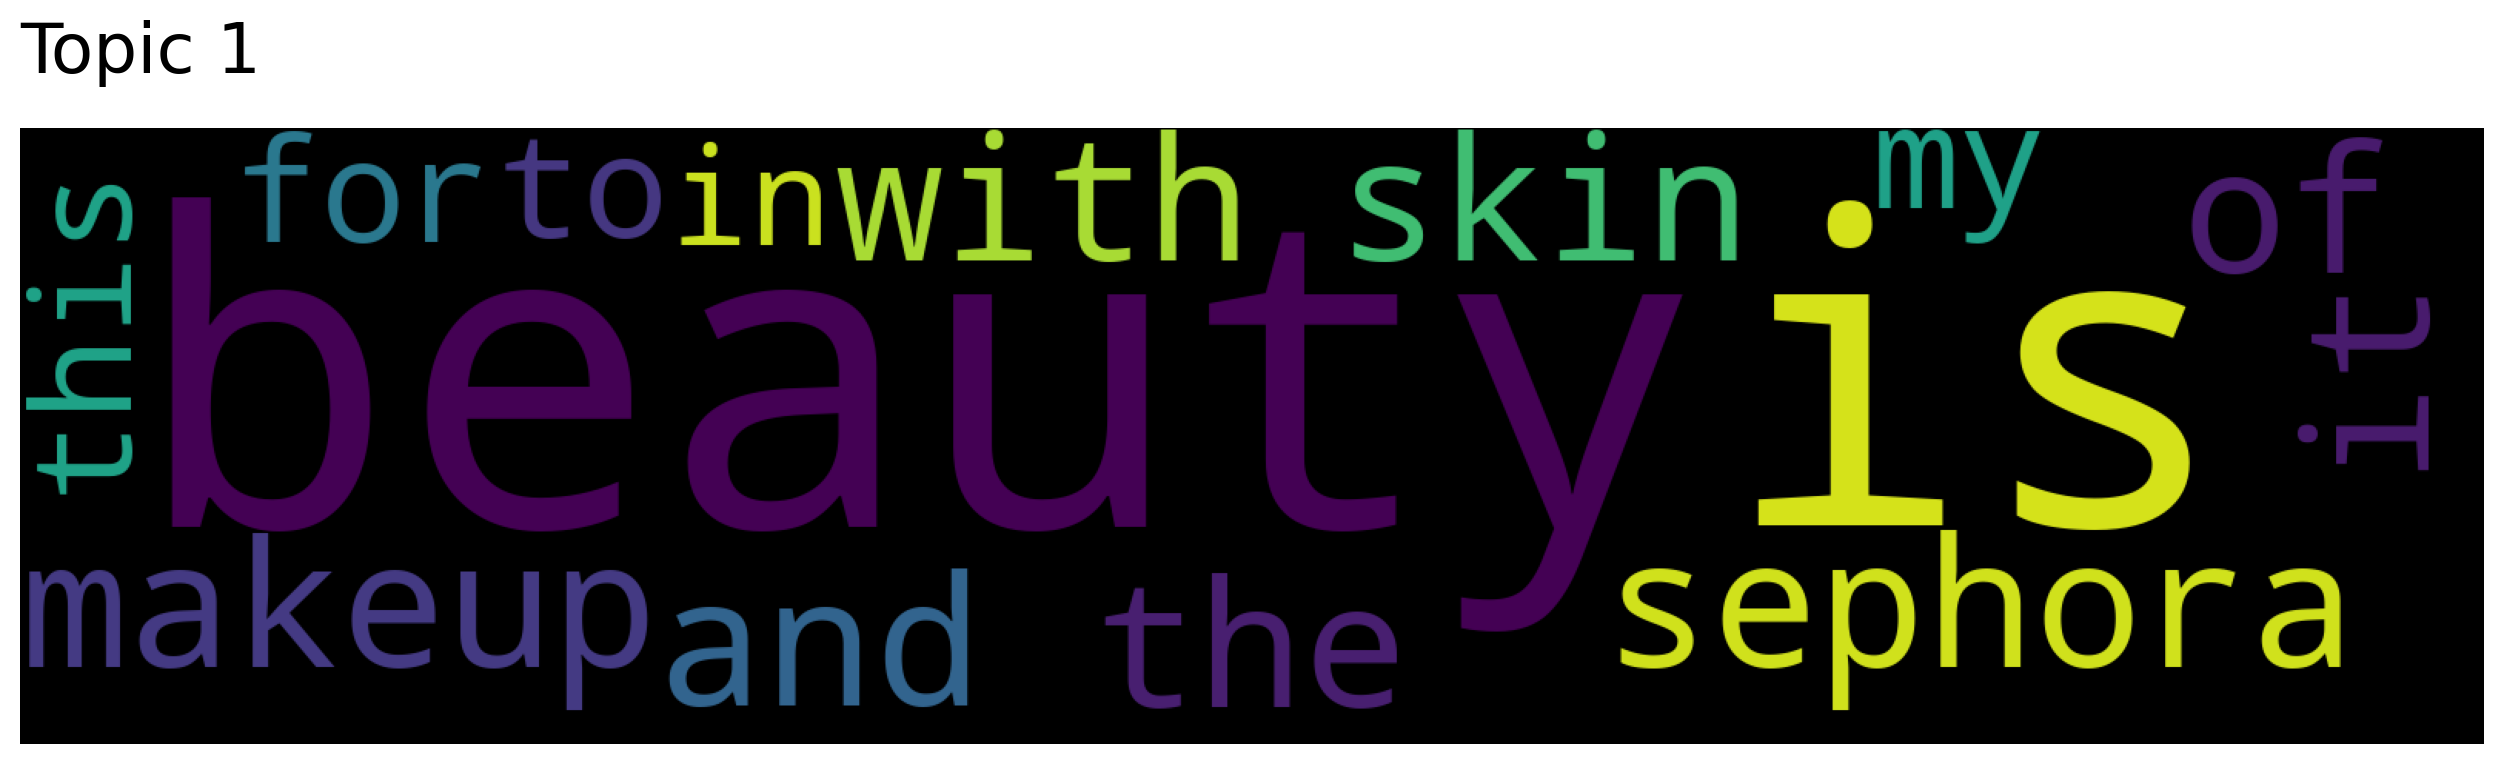

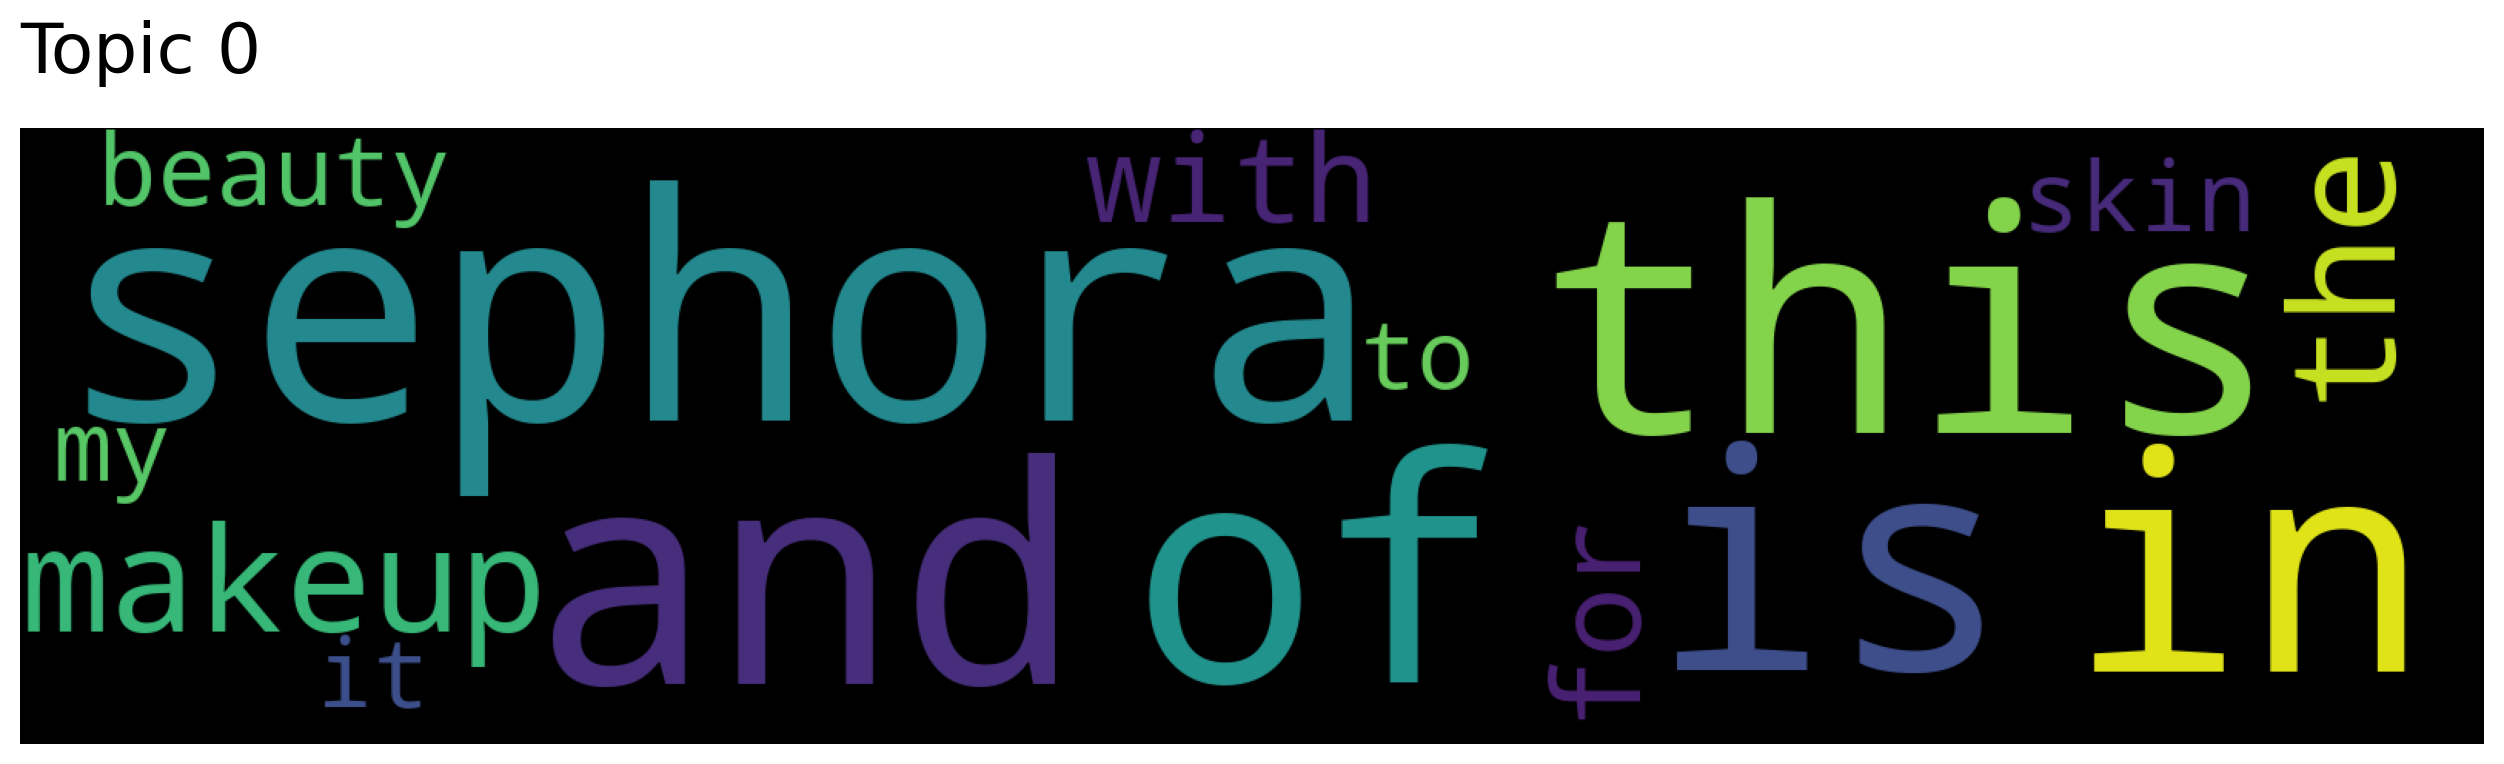

In [100]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["makeup"], num_topics=2)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [102]:
print(topic_words)

[array(['beauty', 'is', 'sephora', 'and', 'makeup', 'the', 'of', 'skin',
       'with', 'it', 'my', 'to', 'for', 'this', 'in'], dtype='<U7'), array(['sephora', 'this', 'of', 'is', 'and', 'in', 'makeup', 'the',
       'with', 'for', 'beauty', 'skin', 'my', 'to', 'it'], dtype='<U7')]
